In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)


In [20]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
# Regression target
y_reg = df["math score"]

# Classification target
df["result"] = df["math score"].apply(lambda x: "Pass" if x >= 50 else "Fail")
y_class = df["result"]


In [22]:
X = df[["reading score", "writing score"]]


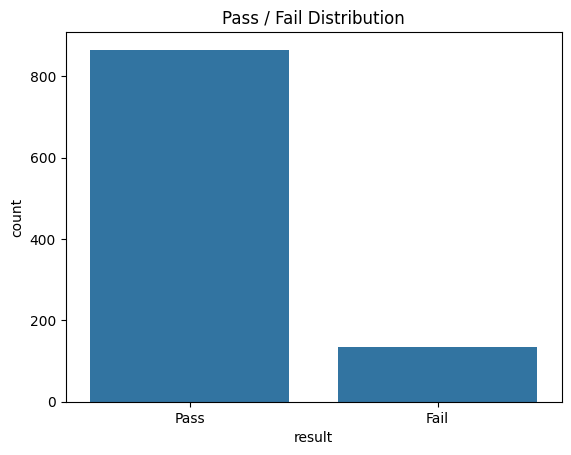

In [23]:
sns.countplot(x="result", data=df)
plt.title("Pass / Fail Distribution")
plt.show()


In [24]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y_class, test_size=0.3, random_state=42
)


In [25]:
scaler = StandardScaler()
Xc_train_s = scaler.fit_transform(Xc_train)
Xc_test_s = scaler.transform(Xc_test)


In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xc_train_s, yc_train)
knn_pred = knn.predict(Xc_test_s)


In [27]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(Xc_train, yc_train)
dt_pred = dt_clf.predict(Xc_test)


In [28]:
cls_results = pd.DataFrame({
    "Model": ["KNN", "Decision Tree"],
    "Accuracy": [
        accuracy_score(yc_test, knn_pred),
        accuracy_score(yc_test, dt_pred)
    ],
    "Precision": [
        precision_score(yc_test, knn_pred, pos_label="Pass"),
        precision_score(yc_test, dt_pred, pos_label="Pass")
    ],
    "Recall": [
        recall_score(yc_test, knn_pred, pos_label="Pass"),
        recall_score(yc_test, dt_pred, pos_label="Pass")
    ],
    "F1 Score": [
        f1_score(yc_test, knn_pred, pos_label="Pass"),
        f1_score(yc_test, dt_pred, pos_label="Pass")
    ]
})

cls_results


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.843333,0.885496,0.931727,0.908023
1,Decision Tree,0.826667,0.902041,0.887550,0.894737


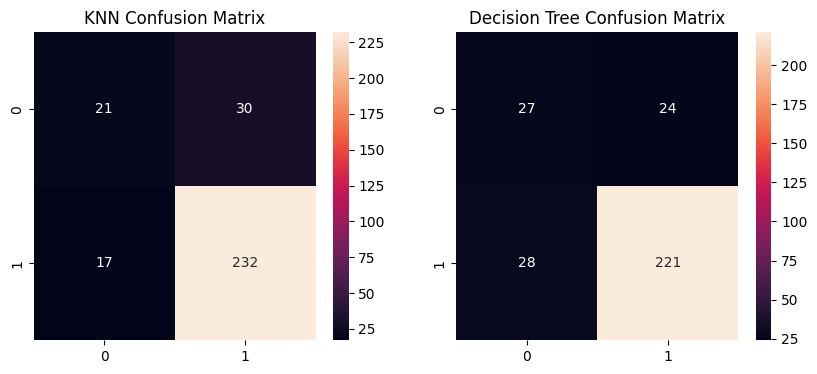

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(yc_test, knn_pred),
            annot=True, fmt="d", ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")

sns.heatmap(confusion_matrix(yc_test, dt_pred),
            annot=True, fmt="d", ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")

plt.show()


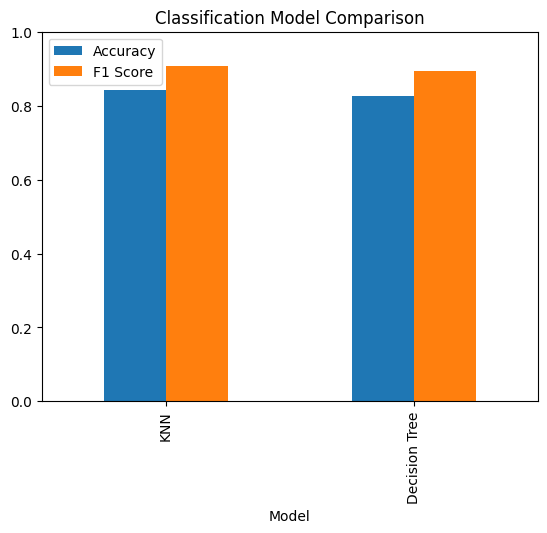

In [30]:
cls_results.set_index("Model")[["Accuracy", "F1 Score"]].plot(kind="bar")
plt.title("Classification Model Comparison")
plt.ylim(0,1)
plt.show()


In [31]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)


In [32]:
lr = LinearRegression()
lr.fit(df[["reading score"]], y_reg)
lr_pred = lr.predict(df[["reading score"]])


In [33]:
mlr = LinearRegression()
mlr.fit(Xr_train, yr_train)
mlr_pred = mlr.predict(Xr_test)


In [34]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(Xr_train, yr_train)
dt_reg_pred = dt_reg.predict(Xr_test)


In [35]:
reg_results = pd.DataFrame({
    "Model": ["Linear", "Multiple Linear", "Decision Tree"],
    "MAE": [
        mean_absolute_error(y_reg, lr_pred),
        mean_absolute_error(yr_test, mlr_pred),
        mean_absolute_error(yr_test, dt_reg_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_reg, lr_pred)),
        np.sqrt(mean_squared_error(yr_test, mlr_pred)),
        np.sqrt(mean_squared_error(yr_test, dt_reg_pred))
    ],
    "R2": [
        r2_score(y_reg, lr_pred),
        r2_score(yr_test, mlr_pred),
        r2_score(yr_test, dt_reg_pred)
    ]
})

reg_results


,Model,MAE,RMSE,R2
0,Linear,7.056943,8.726770,0.668437
1,Multiple Linear,7.518242,9.036344,0.671817
2,Decision Tree,9.569056,12.111364,0.410455


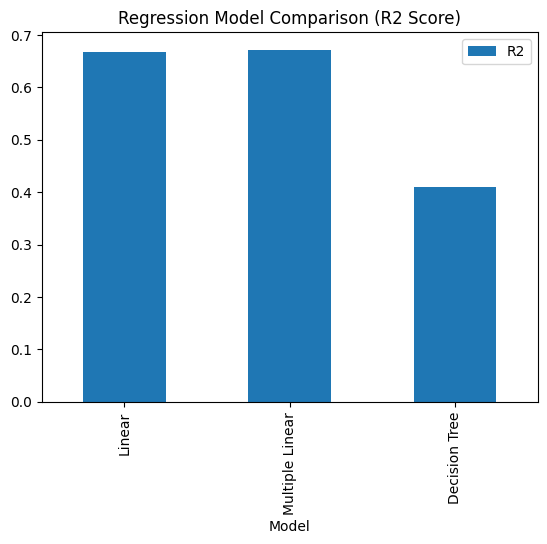

In [36]:
reg_results.set_index("Model")[["R2"]].plot(kind="bar")
plt.title("Regression Model Comparison (R2 Score)")
plt.show()


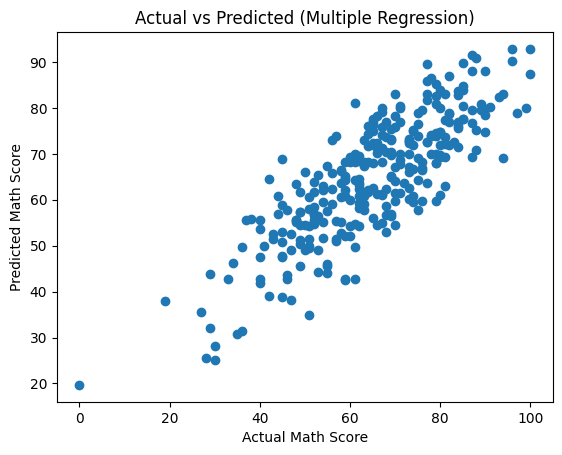

In [37]:
plt.scatter(yr_test, mlr_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted (Multiple Regression)")
plt.show()
